In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('../Data/clean_df.csv')

df.head(2)
# Creating numeric and string sub data frames
df_numeric = df.select_dtypes(include=['int64','float64'])
df_object = df.select_dtypes(include=['object'])

In [14]:
# Creating numeric and string sub data frames
df_numeric = df.select_dtypes(include=['int64','float64'])
df_object = df.select_dtypes(include=['object'])

# Plots on Numeric Data Frames

In [15]:
def multi_box_plot(multi_plt_df,fig_size = (12,6)):
    col_size = len(multi_plt_df.columns)
    fig, axs = plt.subplots(max(2,col_size//2), 2,figsize=fig_size)
    for pos,column in enumerate(multi_plt_df.columns):
        x = min(pos//2 + pos%2 ,pos//2)
        y = max(pos%2,pos%2)
#         print(x,y)
        axs[x, y].boxplot(multi_plt_df[column].values, 0,'k', 0)
        axs[x, y].set_title(column,fontsize = 15)

    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                        hspace=0.4, wspace=0.3)

In [42]:
fees_columns = ['Management Fee','Performance Fee']

fund_performance = ['Return_6m', 'Return_12m','Return_24m',
                    'Volatility_6m', 'Volatility_12m', 'Volatility_24m']
excess_return_features =[col for col in df_numeric.columns if 'Excess_Return' in col]

other_numeric_features = ['Liquidity Ratios','age_months',
                          '#_Funds_managed', 'Manager_avg_Assets',
                         'Last_Assets', 'Assets_Flow_12m']

dummy_columns = ['CVM Category_Multimarket', 'CVM Category_Equities', 'CVM Category_FX',
       'Tax Classification_Exempt', 'Tax Classification_Long Term',
       'Tax Classification_Short Term', 'Private Credit Anbima_Not applicable',
       'Private Credit Anbima_Yes', 'Leveraged Anbima_Yes',
       'Performance Fee Reference Index_100% do IBX','CVM Category_Fixed Income',
       'Performance Fee Reference Index_100% do Ibovespa',
       'Performance Fee Reference Index_Other_performance_fee',
       'Performance Fee Reference Index_There is not', 'Benchmark_Dollar',
       'Benchmark_IBX', 'Benchmark_IMA-B', 'Benchmark_Ibovespa',
       'Benchmark_Not Informed', 'Benchmark_Other_Benchmark']

## Searching for outliers

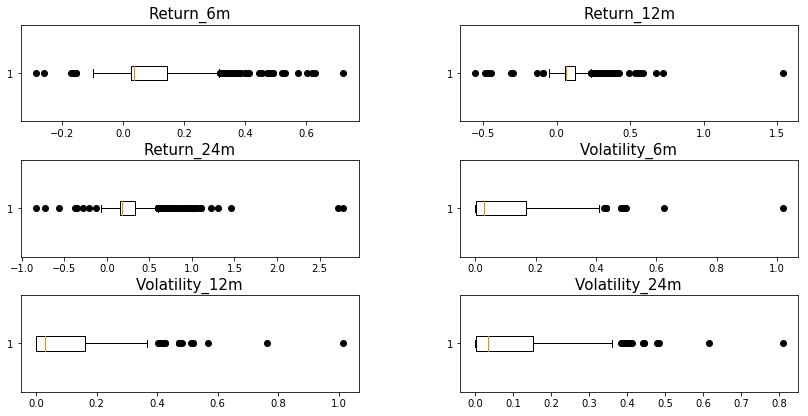

In [18]:
# In performance features
multi_box_plot(df_numeric[fund_performance])

No evidence of any major outlier regarding volatility and returns. 

In [19]:
# Fees columns
df_numeric[fees_columns].describe()

,Management Fee,Performance Fee
count,1376.000000,1376.000000
mean,0.016221,0.065618
std,0.010548,0.093911
min,0.000000,0.000000
25%,0.007000,0.000000
50%,0.015000,0.000000
75%,0.025000,0.200000
max,0.055000,0.500000


No evidence in outlier in Management Fee

In [22]:
df_numeric[excess_return_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Excess_Return_-_CDI_Opening_6m,1376.0,0.057965,0.110351,-0.316966,-0.003518,0.003814,0.112409,0.691335
Excess_Return_-_CDI_Opening_12m,1376.0,0.029541,0.093374,-0.616144,-0.009752,0.001624,0.060938,1.474171
Excess_Return_-_CDI_Opening_24m,1376.0,0.098390,0.214120,-0.998428,-0.011493,0.012449,0.166581,2.611821
Excess_Return_-_Ibovespa_6m,1376.0,-0.139949,0.110351,-0.514880,-0.201432,-0.194100,-0.085505,0.493420
Excess_Return_-_Ibovespa_12m,1376.0,-0.055984,0.093374,-0.701669,-0.095277,-0.083901,-0.024587,1.388647
Excess_Return_-_Ibovespa_24m,1376.0,-0.214210,0.214120,-1.311028,-0.324093,-0.300151,-0.146018,2.299221
Excess_Return_-_Dollar_6m,1376.0,0.116883,0.110351,-0.258048,0.055400,0.062732,0.171328,0.750253
Excess_Return_-_Dollar_12m,1376.0,-0.059746,0.093374,-0.705431,-0.099040,-0.087664,-0.028350,1.384884
Excess_Return_-_Dollar_24m,1376.0,0.111164,0.214120,-0.985654,0.001281,0.025223,0.179355,2.624595


## Analizing Most Significant Correlations

##### For correlation I´ll disconsider obvious high correlation columns from featrue list.

In [51]:
corr_columns = fees_columns + ['Return_12m','Volatility_12m'] + other_numeric_features 

In [55]:
unstaked_series = df_numeric[corr_columns].corr().unstack()
unstaked_series = unstaked_series.sort_values(kind="quicksort")

pair_corr_df = pd.DataFrame(unstaked_series)
pair_corr_df.columns = ['correlation']
pair_corr_df.index.names = ['Feature1','Feature2']
# All correlations Lower than -0.5
pair_corr_df[(np.absolute(pair_corr_df['correlation'])>=0.4) & (pair_corr_df['correlation']<0.99)]

,,correlation
Feature1,Feature2,
Volatility_12m,Return_12m,0.426126
Return_12m,Volatility_12m,0.426126


The correlation above points that funds with more risk (volatility) have higer returns.

In [73]:
unstaked_series = df_numeric[dummy_columns].corr().unstack()
unstaked_series = unstaked_series.sort_values(kind="quicksort")

pair_corr_df = pd.DataFrame(unstaked_series)
pair_corr_df.columns = ['correlation']
pair_corr_df.index.names = ['Feature1','Feature2']

# .drop_duplicates('correlation',keep: {'first'})
pair_corr_df[(np.absolute(pair_corr_df['correlation'])>0.7) & 
             (np.absolute(pair_corr_df['correlation'])<0.999)]

,,correlation
Feature1,Feature2,
Tax Classification_Long Term,CVM Category_Equities,-0.865718
CVM Category_Equities,Tax Classification_Long Term,-0.865718
Private Credit Anbima_Not applicable,Tax Classification_Long Term,-0.795655
Tax Classification_Long Term,Private Credit Anbima_Not applicable,-0.795655
Benchmark_Dollar,CVM Category_FX,0.839149
CVM Category_FX,Benchmark_Dollar,0.839149
Private Credit Anbima_Not applicable,CVM Category_Equities,0.908452
CVM Category_Equities,Private Credit Anbima_Not applicable,0.908452


Correlation indicates:
1. Most of long term tax funds are not in equity category.
2. Most long term tax funds are not private credit Anbima.
3. Most CVM category FX have Dollar as a benchmark.
4. Most equity funds are not private credit Anbima

### Scaling data

In [14]:
ss = StandardScaler()
X = df_numeric
Y = df_object
X_sc = pd.DataFrame(ss.fit_transform(X))
X_sc.columns = df_numeric.columns

C:\Users\berku\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\berku\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
## Preview of scaled data
X_sc.head()

,Management Fee,Minimum Investment,Performance Fee,Liquidity Ratios,age_months,CVM Category_Fixed Income,CVM Category_Multimarket,CVM Category_Equities,CVM Category_FX,Tax Classification_Exempt,...,Excess_Return_-_CDI_Opening_12m,Excess_Return_-_CDI_Opening_24m,Excess_Return_-_Ibovespa_6m,Excess_Return_-_Ibovespa_12m,Excess_Return_-_Ibovespa_24m,Excess_Return_-_Dollar_6m,Excess_Return_-_Dollar_12m,Excess_Return_-_Dollar_24m,#_Funds_managed,Manager_avg_Assets
0,1.781016,-0.133156,-0.698973,0.572805,1.595432,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,-0.258833,-0.296130,-0.304793,-0.258833,-0.296130,-0.304793,-0.258833,-0.296130,-0.880455,-0.642840
1,0.832583,-0.116332,1.431467,0.197124,-1.133866,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,-0.018112,-0.163462,-0.442559,-0.018112,-0.163462,-0.442559,-0.018112,-0.163462,-0.850756,0.350568
2,0.832583,-0.116332,1.431467,-0.103422,-0.887983,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,0.054853,-0.038277,-0.380956,0.054853,-0.038277,-0.380956,0.054853,-0.038277,-0.850756,0.350568
3,0.832583,-0.064827,1.431467,0.497669,-0.887983,-0.837177,1.493334,-0.580707,-0.159171,-0.076472,...,0.647893,0.595312,-0.156849,0.647893,0.595312,-0.156849,0.647893,0.595312,-0.850756,0.350568
4,0.642897,-0.133156,1.431467,0.610373,-1.355160,-0.837177,-0.669642,1.722039,-0.159171,-0.076472,...,-0.594905,0.873327,1.559855,-0.594905,0.873327,1.559855,-0.594905,0.873327,-0.880455,-0.707545


In [16]:
X_sc.to_csv('../Data/X_scaled.csv',index=False)
Y.to_csv('../Data/fund_info.csv',index=False)